# Telecom Churn Case Study

## Problem Statement
To analyse customer-level data of a leading telecom firm & build a predictive models to identify customers at high risk of churn and identify the main indicators of churn.

## Business Objective
The dataset contains customer-level information for a span of four consecutive months - June, July, August and September. The months are encoded as 6, 7, 8 and 9, respectively.
The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months. To do this task well, understanding the typical customer behaviour during churn will be helpful.

## Data is distributed into 3 phase
1.  Good Phase i.e. 6th and 7th month data where customer as not issues with the service.
2.  Action Phase i.e. 8th month data where customer experience starts to score.
3.  Churn Phase i.e. 9th month data where  the customer is said to have churned.

# Step 1: Data Cleaning

In [1]:
#Path of the data set
dataPath = "telecom_churn_data.csv" 

#Importing Libraries
import numpy as np
import pandas as pd

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# To perform PCA & Modeling
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the data to a dataframe
raw_df = pd.read_csv(dataPath)
raw_df.shape

(99999, 226)

In [3]:
#Cheking the columns and Data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
raw_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
raw_df._get_numeric_data().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 214 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35)
memory usage: 163.3 MB


In [6]:
#Inspect wheather any of the object data type needs to be converted to numberic
raw_df.loc[:, raw_df.dtypes == np.object].sort_index(axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date_of_last_rech_6       98392 non-null  object
 1   date_of_last_rech_7       98232 non-null  object
 2   date_of_last_rech_8       96377 non-null  object
 3   date_of_last_rech_9       95239 non-null  object
 4   date_of_last_rech_data_6  25153 non-null  object
 5   date_of_last_rech_data_7  25571 non-null  object
 6   date_of_last_rech_data_8  26339 non-null  object
 7   date_of_last_rech_data_9  25922 non-null  object
 8   last_date_of_month_6      99999 non-null  object
 9   last_date_of_month_7      99398 non-null  object
 10  last_date_of_month_8      98899 non-null  object
 11  last_date_of_month_9      98340 non-null  object
dtypes: object(12)
memory usage: 9.2+ MB


In [7]:
# Drop all the object columns as dates and not required for modeling, also it would make EDA simplier
raw_df = raw_df._get_numeric_data()
raw_df.shape

(99999, 214)

### Filtering High value customers for Analysis

And only considering the data from 6th & 7th month which is defined as Good Phase.



In [8]:
#Observing the recharge and data columns of one month
raw_df[['av_rech_amt_data_6', 'total_rech_amt_6', 'total_rech_data_6', 'max_rech_amt_6', 'total_rech_num_6']].head()

,av_rech_amt_data_6,total_rech_amt_6,total_rech_data_6,max_rech_amt_6,total_rech_num_6
0,252.0,362,1.0,252,4
1,NaN,74,NaN,44,4
2,NaN,168,NaN,86,5
3,NaN,230,NaN,60,10
4,56.0,196,1.0,56,5


In [9]:
# Checking Percentage missing values in the Data and Recharge columns
raw_df[['av_rech_amt_data_6', 'total_rech_amt_6', 'total_rech_data_6', 'max_rech_amt_6', 'total_rech_num_6']].isnull().sum() / len(raw_df)

av_rech_amt_data_6    0.748467
total_rech_amt_6      0.000000
total_rech_data_6     0.748467
max_rech_amt_6        0.000000
total_rech_num_6      0.000000
dtype: float64

**Note: Using 'total_rech_amt_6' & 'total_rech_amt_7' columns as this covers the total amount of money spent in good phase and has zero percent missing values.**

In [10]:
# Derving new "gd_total_rech_amt" column
raw_df['gd_total_rech_amt'] = (raw_df.total_rech_amt_6+raw_df.total_rech_amt_7)/2
raw_df['gd_total_rech_amt'].describe(percentiles= [.3,.5,.7,.8,.9])

count    99999.000000
mean       325.238792
std        370.833466
min          0.000000
30%        134.500000
50%        229.000000
70%        368.500000
80%        485.000000
90%        698.000000
max      37762.500000
Name: gd_total_rech_amt, dtype: float64

In [11]:
# Applying filter and getting the top 30% of High value customers
raw_df= raw_df[raw_df['gd_total_rech_amt'] >= 368.5]
raw_df.shape

(30011, 215)

### Deriving the churn customers or target column
The churn is decided based on the usage and only considering the data from 9th month which is defined as Churn Phase.

In [12]:
#Observing the usage parameters of churn phase
raw_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_3g_mb_9', 'vol_2g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_3g_mb_9,vol_2g_mb_9
7,0.00,0.00,0.0,0.0
8,34.91,142.18,0.0,0.0
13,631.86,446.09,0.0,0.0
16,334.56,255.74,0.0,0.0
17,87.13,631.08,0.0,0.0


In [13]:
# Percentage missing values in the usage parameters of churn phase
raw_df[['total_ic_mou_9', 'total_og_mou_9', 'vol_3g_mb_9', 'vol_2g_mb_9']].isnull().sum() / len(raw_df)

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_3g_mb_9       0.0
vol_2g_mb_9       0.0
dtype: float64

In [14]:
# Deriving the churn colum churn based on the usage and zero usage will consider churn as 1
raw_df['churn'] = raw_df.apply(lambda x: 1 if (x.total_ic_mou_9 == 0 and x.total_og_mou_9 == 0 and x.vol_3g_mb_9 == 0 and x.vol_2g_mb_9 == 0) else 0, axis=1)
raw_df['churn'].head()

7     1
8     0
13    0
16    0
17    0
Name: churn, dtype: int64

In [15]:
#Dropping the of 9th month attributes as Churn is derived
spike_cols = [col for col in raw_df.columns if '_9' in col]
raw_df.drop(spike_cols, axis = 1, inplace = True)
raw_df.drop('sep_vbc_3g', axis = 1, inplace = True)
raw_df.shape

(30011, 164)

In [16]:
raw_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,gd_total_rech_amt,churn
7,7000701601,109,0.0,0.0,0.0,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.00,0.0,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,802,57.74,19.38,18.74,1185.0,1
8,7001524846,109,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,0.0,0.0,0.0,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,0.0,0.0,0.0,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,NaN,2.0,3.0,NaN,154.0,23.0,NaN,2.0,3.0,NaN,0.0,0.0,NaN,177.0,69.0,0.0,356.0,0.03,0.0,750.95,11.94,NaN,0.0,19.83,NaN,0.0,0.0,NaN,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,NaN,1.0,1.0,315,21.03,910.65,12

In [17]:
# Dropping the columns having same values
clean_df = raw_df.copy()
clean_df =clean_df.loc[:,clean_df.std() != 0]
clean_df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,gd_total_rech_amt,churn
count,3.001100e+04,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,11397.000000,11662.000000,11754.000000,30011.000000,30011.000000,30011.000000,30011.00000

### Missing value Treatment

In [18]:
# Checking percentage missing values
clean_df_missing =clean_df.isnull().sum() / len(clean_df)
clean_df_missing.sort_values(ascending=False)

max_rech_data_6       0.620239
fb_user_6             0.620239
count_rech_3g_6       0.620239
count_rech_2g_6       0.620239
arpu_3g_6             0.620239
                        ...   
max_rech_amt_8        0.000000
last_day_rch_amt_6    0.000000
last_day_rch_amt_7    0.000000
last_day_rch_amt_8    0.000000
mobile_number         0.000000
Length: 154, dtype: float64

In [19]:
# For getting better interpretation of data drop columns having null values higher than 50%
null_col =clean_df_missing[clean_df_missing > 0.50].index
clean_df.drop(null_col, axis = 1, inplace = True)
clean_df.shape

(30011, 127)

In [20]:
# Printing the modified dataframe
clean_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,gd_total_rech_amt,churn
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.50,0.00,6.50,0.00,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.00,0.0,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.00,0.00,10.23,0.00,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,356.0,0.03,0.0,750.95,11.94,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,519.0,0
13,7002191713,492.846,205.671,593.260,501.76,108.39,534.24,413.31,119.28,482.46,23.53,144.24,72.11,7.98,35.26,1.44,49.63,6.19,36.01,151.13,47.28,294.46,4.54,0.00,23.51,0.0,0.0,0.49,205.31,53.48,353.99,446.41,85.98,498.23,255.36,52.94,156.94,0.00,0.00,0.00,701.78,138.93,655.18,0.0,0.00,1.29,0.00,0.00,4.78,0.00,0.0,0.0,907.09,192.41,1015.26,67.88,7.58,52.58,142.88,18.53,195.18,4.81,0.00,7.49,215.58,26.11,255.26,115.68,38.29,154.58,308.13,29.79,317.91,0.00,0.00,1.91,423.81,68.09,474.41,968.61,172.58,1144.53,0.45,0.0,0.0,245.28,62.11,393.39,83.48,16.24,21.44,6,4,11,507,253,717,110,110,130,110,50,0,0.0,0.0,0.02,0.0,0.00,0.00,0,0,0,0,0,3,0,0,0,0,0,0,2607,0.00,0.00,0.00,380.0,0
16,7000875565,430.975,299.869,187.894,50.51,74.01,70.61,296.29,229.74,162.76,0.00,2.83,0.00,0.00,17.74,0.00,42.61,65.16,67.38,273.29,145.99,128.28,0.00,4.48,10.26,0

In [21]:
clean_df.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,gd_total_rech_amt,churn
count,3.001100e+04,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,29695.000000,29708.000000,29073.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,587.284404,589.135427,534.857433,299.184718,307.447285,276.234168,422.380819,428.248096,387.121245,17.598062,13.660030,13.683965,29.633675,22.260754,22.161948,95.688242,96.706103,89.951446,183.208674,183.120362,172.998297,7.053601,7.169655,6.703844,1.583837,1.881222,1.767998,285.959416,287.005181,269.662288,191.772393,201.916113,177.752086,205.259036,215.588560,185.362328,2.032163,2.054989,1.847471,399.067969,419.564032,364.965911,2.288522,2.229914,2.094787,5.979323,7.501222,7.107334,0.699876,0.048085

In [22]:
# Dropping variables which are not important for modellling
print(clean_df.shape)
clean_df.drop(['mobile_number'], axis=1, inplace = True)
clean_df.shape

(30011, 127)


(30011, 126)

In [23]:
clean_df.isnull().sum().sort_values(ascending = False).head()

loc_ic_t2f_mou_8    938
loc_og_t2t_mou_8    938
isd_ic_mou_8        938
std_og_t2m_mou_8    938
ic_others_8         938
dtype: int64

In [24]:
#Sorting categorical and continuos attributes and considering "spl_ic_mou_*" continuos
cat_col = []
num_col = []
for col in clean_df:
  if clean_df[col].max() <= 20:
    if 'spl_ic_mou' not in col:
      cat_col.append(col)
    else:
      num_col.append(col)
  else:
    num_col.append(col)
print(len(cat_col))
print(len(num_col))
print(len(clean_df.columns))

7
119
126


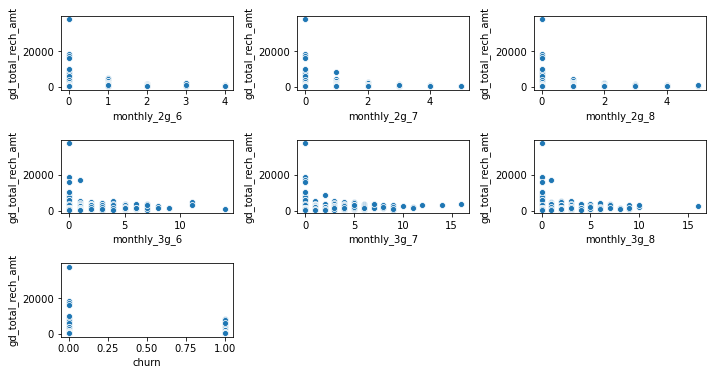

In [25]:
# Checking the difference in spread of the categorical attributes
plt.figure(figsize=(10, 10))
for i in range(len(cat_col)):
    plt.subplot(6,3,i+1)
    sns.scatterplot(x = cat_col[i], y = 'gd_total_rech_amt', data = clean_df)
plt.tight_layout()
plt.show()

In [26]:
#Checking the null values in categorical attributes
clean_df[cat_col].isnull().sum()

monthly_2g_6    0
monthly_2g_7    0
monthly_2g_8    0
monthly_3g_6    0
monthly_3g_7    0
monthly_3g_8    0
churn           0
dtype: int64

In [27]:
#Imputing the null values with the median as all the attributes having null values are continuous
for col in clean_df:
  if clean_df[col].isnull().sum() != 0:
   clean_df[col] =clean_df[col].fillna((clean_df[col].median()))
clean_df.isnull().sum().sort_values(ascending = False).head()

churn               0
spl_og_mou_7        0
std_og_t2m_mou_6    0
std_og_t2m_mou_7    0
std_og_t2m_mou_8    0
dtype: int64

In [28]:
clean_df.shape

(30011, 126)

# Step 2: Data Preparation

### EDA

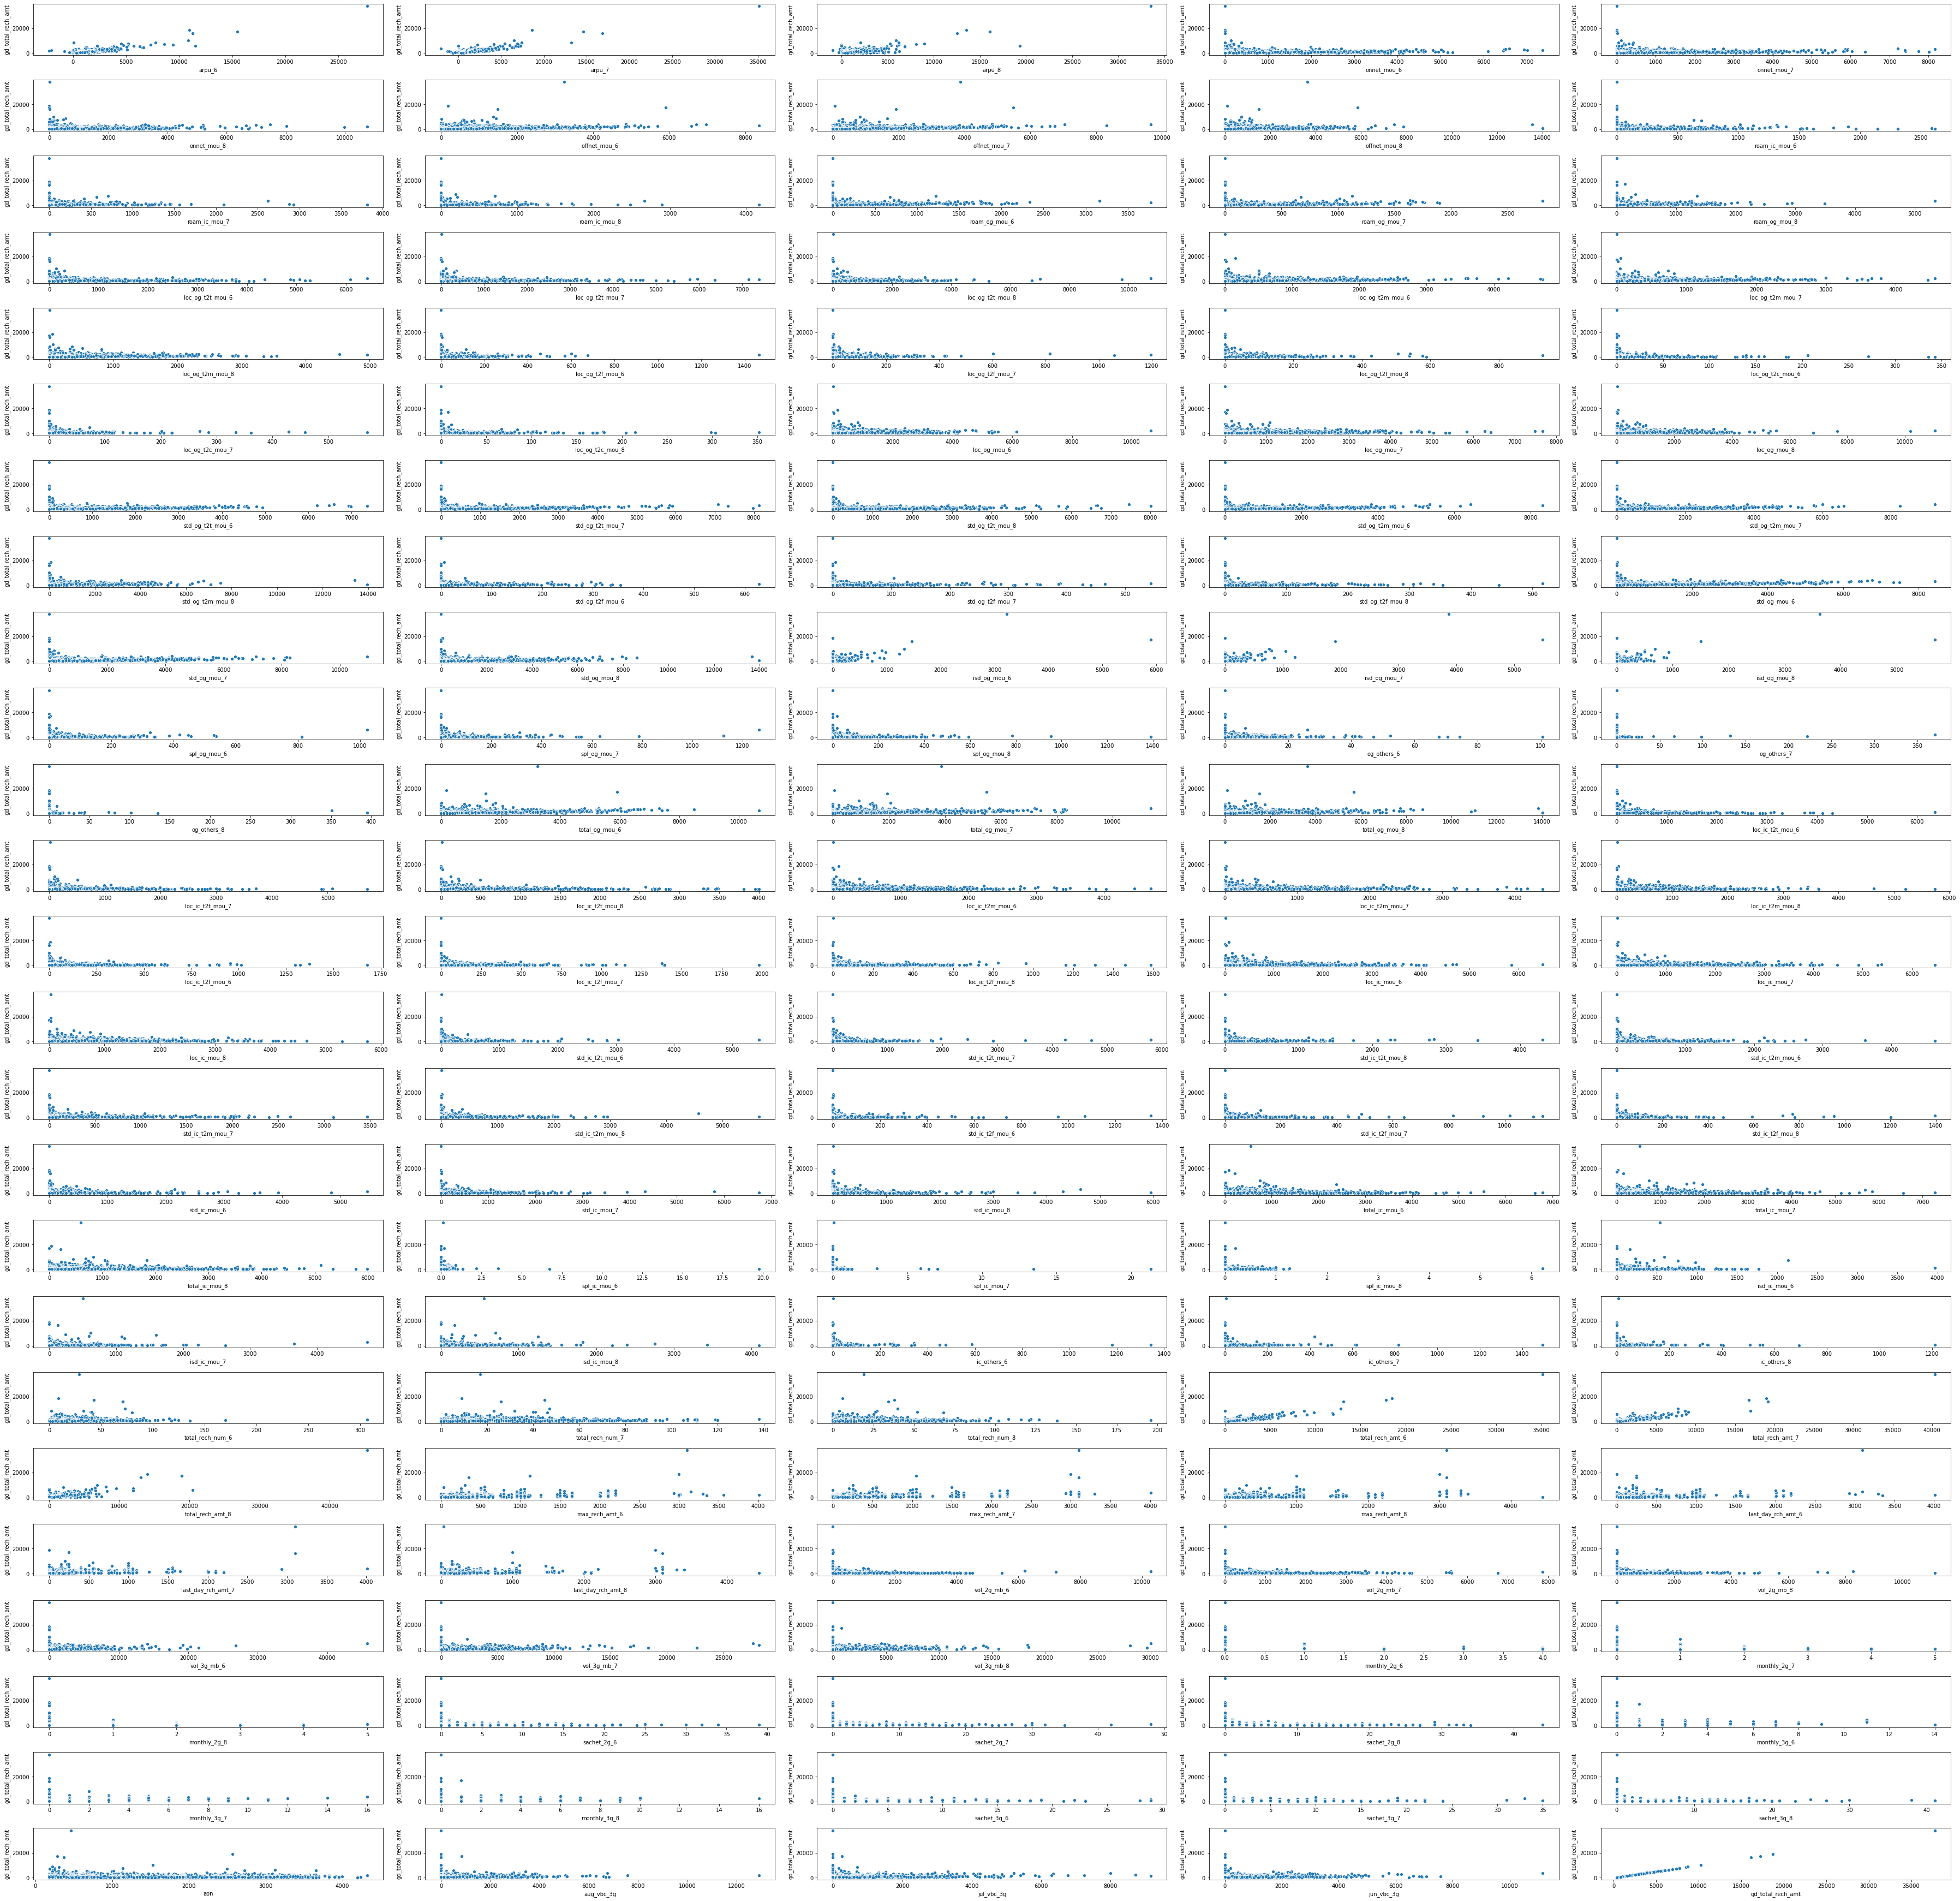

In [209]:
# Knowing the difference in spread of the w.r.t to chur column
plt.figure(figsize=(50, 50))
for i in range(1,126):
    plt.subplot(26,5,i)
    sns.scatterplot(x = clean_df.columns[i-1], y = 'gd_total_rech_amt', data = clean_df)
plt.tight_layout()
plt.show()

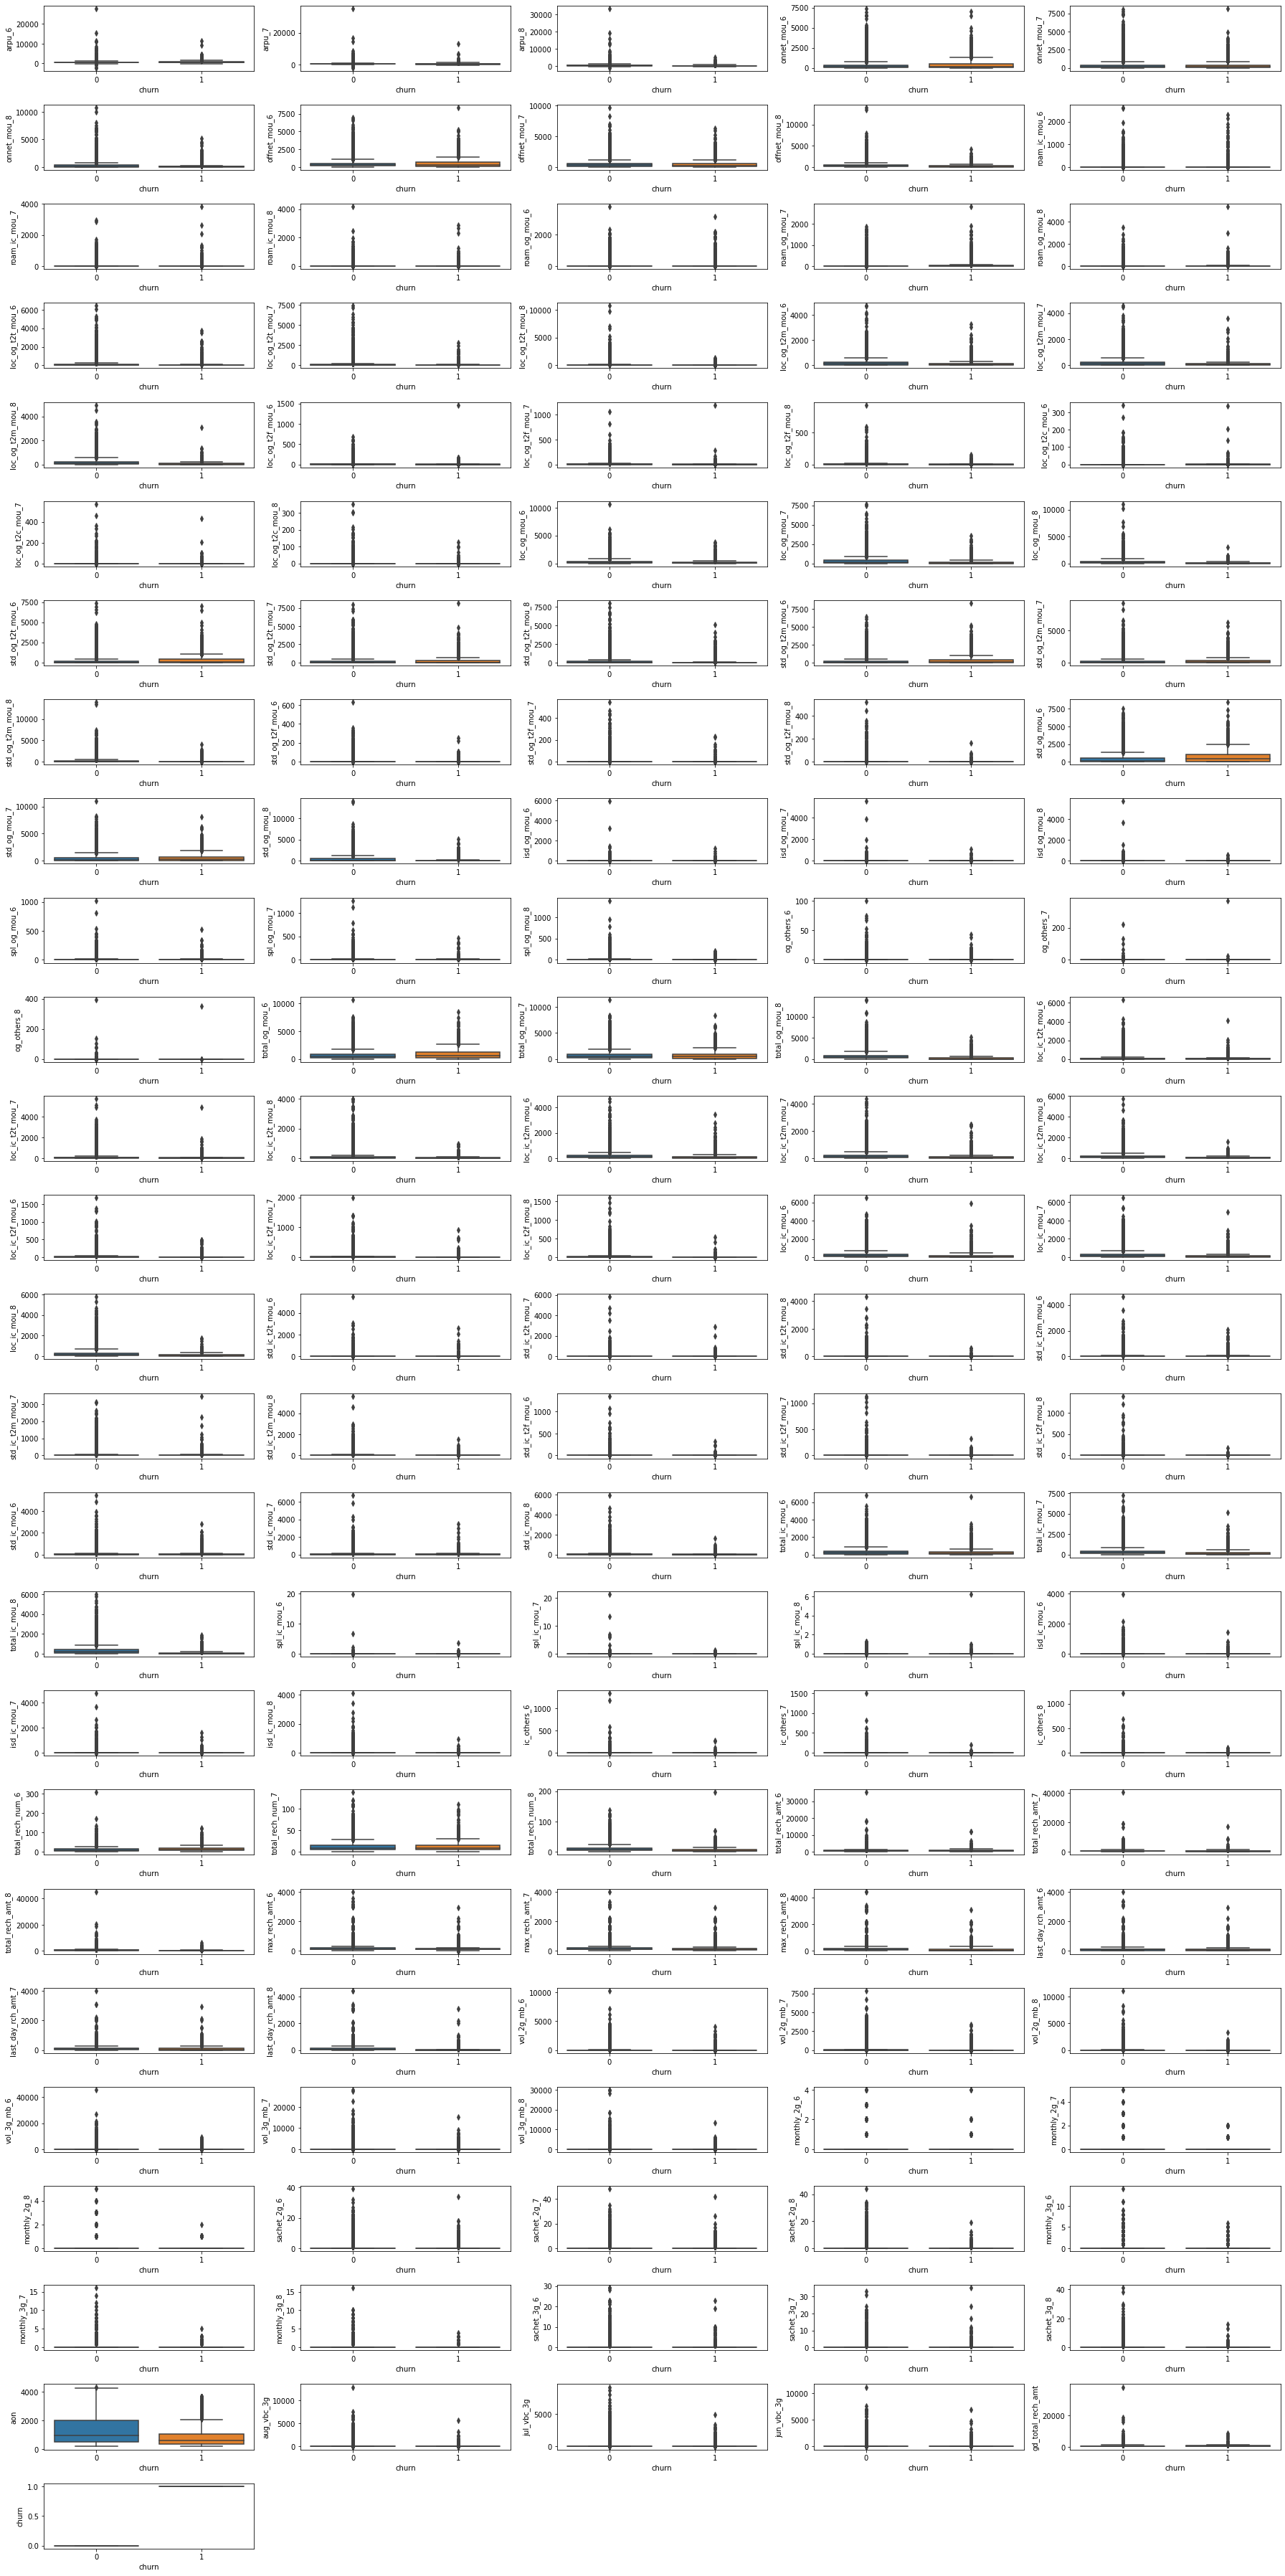

In [211]:
# Knowing the difference in spread of the w.r.t to churn column
plt.figure(figsize=(25, 50))
for i in range(1,127):
    plt.subplot(26,5,i)
    sns.boxplot(y=clean_df.iloc[:,i-1], x=clean_df.churn)
plt.tight_layout()
plt.show()

In [29]:
# Capping the outliers
for col in clean_df.columns:
    percentiles = clean_df[col].quantile([0.01,0.99]).values
    clean_df[col] = np.clip(clean_df[col], percentiles[0], percentiles[1])

In [30]:
clean_df.describe(percentiles = [.25,.5,.8,.95,.98,0.99])

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,gd_total_rech_amt,churn
count,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.0,30011.0,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.00000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,577.817770,579.655531,524.418269,288.709028,296.336896,261.651121,413.154522,418.225301,372.934726,14.803628,10.634542,10.593967,25.564224,18.600768,17.576605,86.957185,86.904880,79.630216,176.888803,177.531515,166.123267,6.287116,6.403850,5.899530,1.327933,1.538465,1.473665,277.149396,277.857540,259.013692,182.081016,191.742566,164.265056,195.379997,205.284781,170.621227,1.492833,1.448338,1.276300,387.065499,406.917991,345.484915,0.792380,0.795421,0.554784,5.316702,6.629540,6.039267,0.628516,0.0,0.0,677.225921,698.375059,612.912128,63.169907,64.14561

In [31]:
clean_df.shape

(30011, 126)

### Splitting into test and train

In [32]:
# Splitting train and test database
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(clean_df, train_size = 0.7, test_size = 0.3, random_state = 100)

### Sacling the test and train dataset

In [33]:
#Scaling the features using Standard scaling
non_binary_df = df_train.drop(df_train.loc[:,df_train.isin([0,1]).all()], axis = 1)
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
df_train[non_binary_df.columns] = sc_X.fit_transform(df_train[non_binary_df.columns])
df_train.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,gd_total_rech_amt,churn
count,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,21007.0,21007.0,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,2.100700e+04,21007.000000
mean,-7.680976e-17,4.837902e-17,-1.020536e-16,-8.532986e-18,-1.230616e-17,-1.243564e-16,2.676860e-18,1.566478e-17,1.441250e-16,-6.362101e-17,-3.755267e-16,4.790284e-16,-2.394497e-15,-1.136516e-15,-1.707287e-15,1.391861e-16,-3.573463e-17,-5.996906e-17,8.010761e-18,-1.024474e-16,-2.383542e-17,-3.855564e-16,6.817960e-16,4.640467e-16,-7.368685e-16,1.009372e-15,-5.448903e-16,3.039940e-17,-6.922312e-17,1.009966e-16,5.034505e-17,1.017778e-15,1.589775e-15,3.850239e-16,-7.562856e-17,-7.349341e-17,-4.996664e-16,-7.362765e-16,-5.855506e-16,-1.925278e-16,1.249589e-16

In [34]:
#Scaling the features using Standard scaling from the train data 
non_binary_df = df_test.drop(df_test.loc[:,df_test.isin([0,1]).all()], axis = 1)

df_test[non_binary_df.columns] = sc_X.transform(df_test[non_binary_df.columns])
df_test.describe()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,gd_total_rech_amt,churn
count,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.0,9004.0,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000,9004.000000
mean,-0.001285,-0.007960,-0.019912,-0.005589,-0.011766,-0.011704,0.008318,0.002953,-0.003054,-0.026335,-0.006956,-0.021537,-0.017061,-0.007025,-0.012092,-0.003353,0.001458,-0.002229,-0.004885,0.015832,-0.009060,-0.002952,0.006713,-0.009983,0.007741,0.001031,-0.023223,-0.006377,0.009750,-0.008376,-0.002221,-0.010577,-0.009378,0.013229,-0.003121,0.006964,0.011283,0.002871,0.010561,0.007836,-0.009490,-0.002428,0.000434,0.010598,-0.001148,0.002583,0.002568,-0.000568,0.003101,0.0,0.0,0.007924,-0.003891,-0.007233,-0.012791,-0.017078,-0.017747,-0.013066,-0.016128,-0.020165,-0.000304,-0.004250,0.002932,-0.012100,-0.022584,-0.021581,0.001105,-0.005003,-0.009118,0.002033,0.005869,-0.00877

In [35]:
# Dividing into X and Y sets for the model building
y_train = df_train.pop('churn')
X_train = df_train.copy()

#Checking the shape
print(X_train.shape)
print(y_train.shape)

(21007, 125)
(21007,)


In [36]:
# Dividing into X and Y sets for the model building
y_test = df_test.pop('churn')
X_test = df_test.copy()


#Checking the shape
print(X_test.shape)
print(y_test.shape)

(9004, 125)
(9004,)


### Handling the imbalance in data using SMOTE

In [37]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train, y_train = sm.fit_sample(X_train, y_train)

#Checking the changed shape
print(X_train.shape)
print(y_train.shape)

(38368, 125)
(38368,)


# Step 3: Modeling

Note: The model evaluation metric used for modeling is "Recall" because it calculates how much actual churn customers, the model has captured. 
    Also "Accuracy" is considered to check overall acuuracy and if too many good customers are predicated as churned or not.

## Interpretable Model : Decision Tree
Here, standard scaler is not used to make the model more interpretable.

In [38]:
# Resplitting train and test database and getting same values for Interpretable Model
np.random.seed(0)
idf_train, idf_test = train_test_split(clean_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [39]:
# Dividing into X and Y sets for the model building
iy_train = idf_train.pop('churn')
iX_train = idf_train.copy()

#Checking the shape
print(iX_train.shape)
print(iy_train.shape)

(21007, 125)
(21007,)


In [40]:
# Dividing into X and Y sets for the model building
iy_test = idf_test.pop('churn')
iX_test = idf_test.copy()


#Checking the shape
print(iX_test.shape)
print(iy_test.shape)

(9004, 125)
(9004,)


In [41]:
iX_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,gd_total_rech_amt
4715,331.304,480.315,386.671,336.33,564.78,424.11,154.94,71.08,88.14,0.0,0.0,0.0,0.0,0.0,0.0,1.01,3.26,8.53,1.66,1.93,1.61,0.00,0.00,0.00,9.06,0.0,0.0,2.68,5.19,10.14,335.31,561.51,415.58,124.21,61.89,86.53,0.0,0.00,0.0,459.53,623.41,502.11,0.00,0.00,0.00,32.23,7.25,2.93,0.0,0.0,0.0,494.44,635.86,515.19,2.13,7.41,1.88,9.28,21.31,4.59,0.00,0.00,0.00,11.41,28.73,6.48,71.18,65.58,62.44,41.46,60.36,108.03,0.0,0.00,0.00,112.64,125.94,170.48,124.21,154.68,176.96,0.15,0.0,0.0,0.00,0.000,0.000,0.0,0.00,0.00,19,24,25,370,553.0,450.0,30,70,50,0,20,10,0.0,211.20,0.00,0.0,0.0,0.00,0,0,0,0.0,1,0,0,0,0,0,0,0,353,0.00,0.00,0.00,461.5
15222,320.013,508.681,480.398,110.08,27.54,131.03,220.86,117.84,168.99,0.0,0.0,0.0,0.0,0.0,0.0,110.08,27.54,131.03,192.11,84.44,110.08,22.74,30.41,55.38,0.00,0.0,0.0,324.94,142.41,296.49,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,6.00,2.98,3.53,0.0,0.0,0.0,330.94,145.39,300.03,19.99,11.64,37.89,481.34,235.29,245.94,94.66,38.53,167.86,596.01,285.48,451.71,3.75,2.93,0.00,0.00,0.00,0.00,0.0,0.98,0.40,3.75,3.91,0.40,607.78,301.91,463.06,0.00,0.0,0.0,8.01,12.510,10.940,0.0,0.00,0.00,5,7,3,290,638.0,458.0,110,198,198,110,110,198,0.0,8.85,51.46,0.0,91.6,235.69,0,1,1,0.0,0,0,0,0,0,0,0,0,1076,170.16,67.21,48.78,464.0
60145,289.191,802.774,562.645,26.19,83.34,84.73,206.61,538.99,411.43,0.0,0.0,0.0,0.0,0.0,0.0,26.19,83.34,84.73,202.36,521.28,409.48,4.25,7.53,1.56,0.00,0.0,0.0,232.81,612.16,495.78,0.00,0.00,0.00,0.00,10.18,0.38,0.0,0.00,0.0,0.00,10.18,0.38,0.81,11.78,0.79,0.00,0.00,0.00,0.0,0.0,0.0,233.63,634.13,496.96,29.46,55.41,43.34,106.99,269.23,178.04,1.78,4.86,1.28,138.24,329.51,222.68,0.00,0.00,0.00,4.00,0.00,0.00,0.0,0.00,0.00,4.00,0.00,0.00,581.74,1244.08,774.51,0.00,0.0,0.0,239.60,240.125,249.888,0.0,0.00,0.00,12,16,15,300,931.0,647.0,30,120,50,30,120,50,0.0,0.00,0.00,0.0,0.0,0.00,0,0,0,0.0,0,0,0,0,0,0,0,0,2282,0.00,0.00,0.00,615.5
62445,491.912,570.752,544.894,177.03,419.24,108.21,641.28,609.36,815.64,0.0,0.0,0.0,0.0,0.0,0.0,177.03,410.03,105.44,169.46,173.78,113.06,0.33,0.00,0.43,0.00,0.0,0.0,346.83,583.81,218.94,0.00,9.21,2.76,471.48,435.58,702.14,0.0,0.00,0.0,471.48,444.79,704.91,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.

### Hyperparameter Tuning

In [58]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(2, 6, 2),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50)
}

n_folds = 3

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring="recall")

# Fit the grid search to the data
grid_search.fit(iX_train, iy_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    8.6s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': range(2, 6, 2),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [59]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores)

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8233727853406169
DecisionTreeClassifier(class_weight='balanced', max_depth=2,
                       min_samples_leaf=50, min_samples_split=50)


### Building the Model

In [60]:
# Fitting the decision tree using the Hyperparameters and kepping the max_depth low to make the model more interpretable
idt_default = DecisionTreeClassifier(max_depth=4, min_samples_leaf=50,
                       min_samples_split=50, class_weight='balanced')
idt_default.fit(iX_train, iy_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4,
                       min_samples_leaf=50, min_samples_split=50)

In [61]:
# Making predictions
iy_pred_default = idt_default.predict(iX_test)
iy_pred_default

array([0, 1, 0, ..., 0, 0, 1])

In [62]:
metrics.recall_score(iy_test, iy_pred_default)

0.8428571428571429

In [63]:
metrics.accuracy_score(iy_test, iy_pred_default)

0.8485117725455353

In [64]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.tree import export_graphviz
import graphviz

# Putting features
features = list(clean_df.columns[1:])

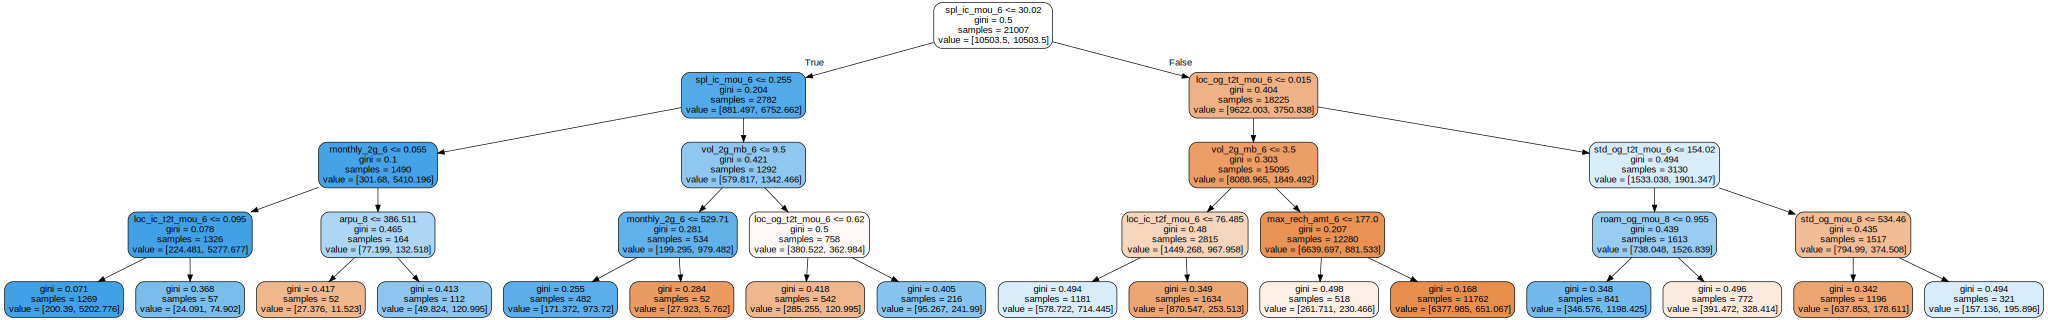

In [66]:
# Plotting tree
data = export_graphviz(idt_default, out_file=None,
                feature_names=features, filled=True,rounded=True)

graph = graphviz.Source(data) 
graph

### Following are the Top 7 Predicting Variable:
**spl_ic_mou_6 ,  loc_og_t2t_mou_6, loc_ic_t2t_mou_6 , arpu_8, monthly_2g_6 , vol_2g_mb_6, monthly_2g_6, loc_ic_t2f_mou_6, max_rech_amt_6, std_og_t2t_mou_6, roam_og_mou_8 &  std_og_mou_8**

## Accuracy Models
Here, standardised input data would be used for better results.

## Applying PCA

In [67]:
pca = PCA(random_state=0) 
pca.fit(X_train)

PCA(random_state=0)

In [68]:
pca.components_

array([[ 9.09485095e-02,  1.46415208e-01,  1.81063497e-01, ...,
         6.46602320e-02,  5.75085719e-02,  1.36295030e-01],
       [ 1.34183625e-01,  1.64919272e-01,  1.02383125e-01, ...,
        -5.10976416e-02, -5.41606506e-02,  1.69457136e-01],
       [ 6.90799465e-02,  1.39606639e-01,  1.43995944e-01, ...,
         9.92850164e-02,  9.62870865e-02,  1.33088111e-01],
       ...,
       [-4.41775674e-03,  1.18013576e-02, -8.36560711e-03, ...,
         5.92871640e-04, -5.02711936e-04,  4.40902656e-03],
       [ 0.00000000e+00,  1.42569634e-16,  2.93779478e-16, ...,
        -2.49952306e-16,  1.62451084e-16,  1.43462281e-16],
       [-0.00000000e+00, -8.17323363e-17,  3.51775751e-17, ...,
         1.71739151e-17,  2.89006629e-17, -1.36022275e-16]])

In [69]:
#Number of compenents required to expalin 95% of the variance
var_cumsum = pca.explained_variance_ratio_
exp_sum = 0
exp_num = 0
for val in var_cumsum:
  if exp_sum <= 0.95:
    exp_sum = exp_sum + val
    exp_num = exp_num + 1
print(exp_num)
print(exp_sum)

66
0.9518284007631189


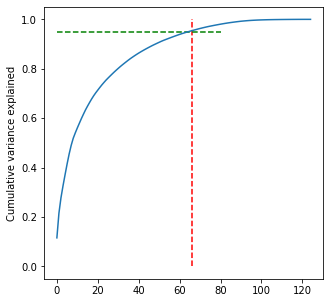

In [70]:
var_cum = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[5,5])
plt.vlines(x=66, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cum)
plt.ylabel("Cumulative variance explained")
plt.show()

In [71]:
pca_final = IncrementalPCA(n_components=66)
np_train_pca = pca_final.fit_transform(X_train)
np_train_pca.shape

(38368, 66)

In [72]:
df_train_pca = pd.DataFrame(np_train_pca)
df_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,-2.321589,1.512227,-0.754205,-2.339458,-1.474081,3.373906,1.193073,1.270633,0.375466,-0.011118,0.704503,-1.035780,0.069757,0.052184,-1.418711,-0.289356,-0.344397,-0.900340,0.865167,0.255545,0.052981,0.083880,0.481978,-0.269073,-0.289165,-0.151897,0.184035,0.267487,1.734918,0.865532,0.231104,-1.794023,-1.700378,0.257761,0.152708,-0.103484,-0.712039,-0.293412,-0.305227,0.068413,0.427667,-0.331432,-0.350611,-0.483417,-0.565292,0.533096,-0.466734,-0.006235,0.506892,-0.036153,-0.319260,0.000328,0.119788,0.271166,0.143655,0.265062,0.148867,-0.006244,-0.530949,0.314942,-0.682995,0.573477,-0.294186,-0.137680,0.021311,-0.117123
1,2.922520,-4.028220,-1.122782,-0.273644,-0.459715,0.071580,-0.795443,-1.663583,-0.662527,2.771496,-2.414037,1.535662,-1.350970,0.192112,-0.066003,0.755666,-0.555031,0.207769,3.920639,-1.289724,-0.153268,0.310731,-0.409660,0.086917,-0.276662,0.059418,0.485020,0.124886,0.200965,-0.713897,0.327683,0.258507,-0.158728,0.393208,0.051487,-0.683699,-0.149745,-1.562859,0.251813,-0.437798,-0.244868,0.101924,-1.053901,0.602622,-0.308630,0.912021,0.793095,0.432150,-0.017447,-1.231209,-1.314627,0.059707,-0.908953,-0.253403,-1.251383,0.161419,0.535212,0.610395,0.322458,-0.413517,0.584386,0.190676,-0.063135,-1.172566,-0.428925,-0.586964
2,3.292927,-2.303483,-0.986096,-0.233882,0.274068,1.896555,-0.721430,-2.134749,6.805928,-3.165151,-2.281135,-0.006576,-0.893291,0.098928,5.218150,-4.535922,1.256786,0.485907,0.509086,-0.698698,-3.045968,-3.337434,0.095228,-3.667448,-0.546179,3.075708,2.568460,-0.613606,-0.078415,0.020428,-0.120375,-0.470242,-0.305259,-0.304710,0.699712,0.393014,-0.737624,1.090025,-0.166162,0.458873,-0.276212,0.081837,-0.218076,-0.690102,-0.147023,-0.640911,-0.367640,-0.283645,0.040498,-0.145096,0.189194,-0.229167,0.093112,0.816778,-0.305198,-0.675197,-0.281060,0.021761,-0.502873,0.159268,-0.162043,-0.585062,0.947227,0.157407,0.509722,-0.001807
3,-0.102117,1.478139,-1.071636,0.110107,1.027318,0.974851,-1.813931,-0.574362,-0.486931,-0.970475,2.266744,-0.157715,0.542524,-0.603545,0.752337,-0.217032,-0.298695,-0.843842,1.335063,-0.459372,-0.893756,0.524239,-0.925687,0.070161,-0.220859,-0.578852,0.128689,-0.910268,-0.178317,-0.444208,-0.360290,-0.423560,-0.019262,0.623267,0.435554,-0.202385,0.202998,1.219405,0.068531,-0.775154,-0.042625,-0.312399,0.052968,0.134776,-0.171208,-0.268811,-0.244055,-0.054087,0.117284,-0.286719,0.041974,-0.350657,-0.153331,0.865958,0.459756,-0.311099,-0.189492,-0.150760,0.085146,0.200083,-0.174777,0.258063,-0.243338,0.125095,0.381683,0.604534
4,-0.799785,0.128456,-1.653257,0.301058,0.364991,1.109468,-0.173017,0.841520,0.784061,-0.634728,-0.008738,-0.587906,-0.370887,-1.170005,0.081332,-0.761174,0.067154,-1.561071,0.214412,0.844178,2.903978,1.477747,-0.144139,0.265752,0.587050,1.503382,0.316306,0.300522,-0.945763,0.050641,0.381201,-0.643042,-0.963458,0.234625,0.527757,0.700067,-3.519821,0.386312,-0.220542,-0.208419,-0.768484,2.096498,1.555225,0.561898,0.650848,-0.391895,0.075341,0.406082,0.110517,0.212310,-0.558234,0.041078,-0.786763,-0.493556,-0.609898,0.196531,0.247767,-0.456896,0.317220,0.059341,-0.238948,-0.128369,-0.239043,0.481959,0.746920,-0.392706


In [73]:
df_train_pca.shape

(38368, 66)

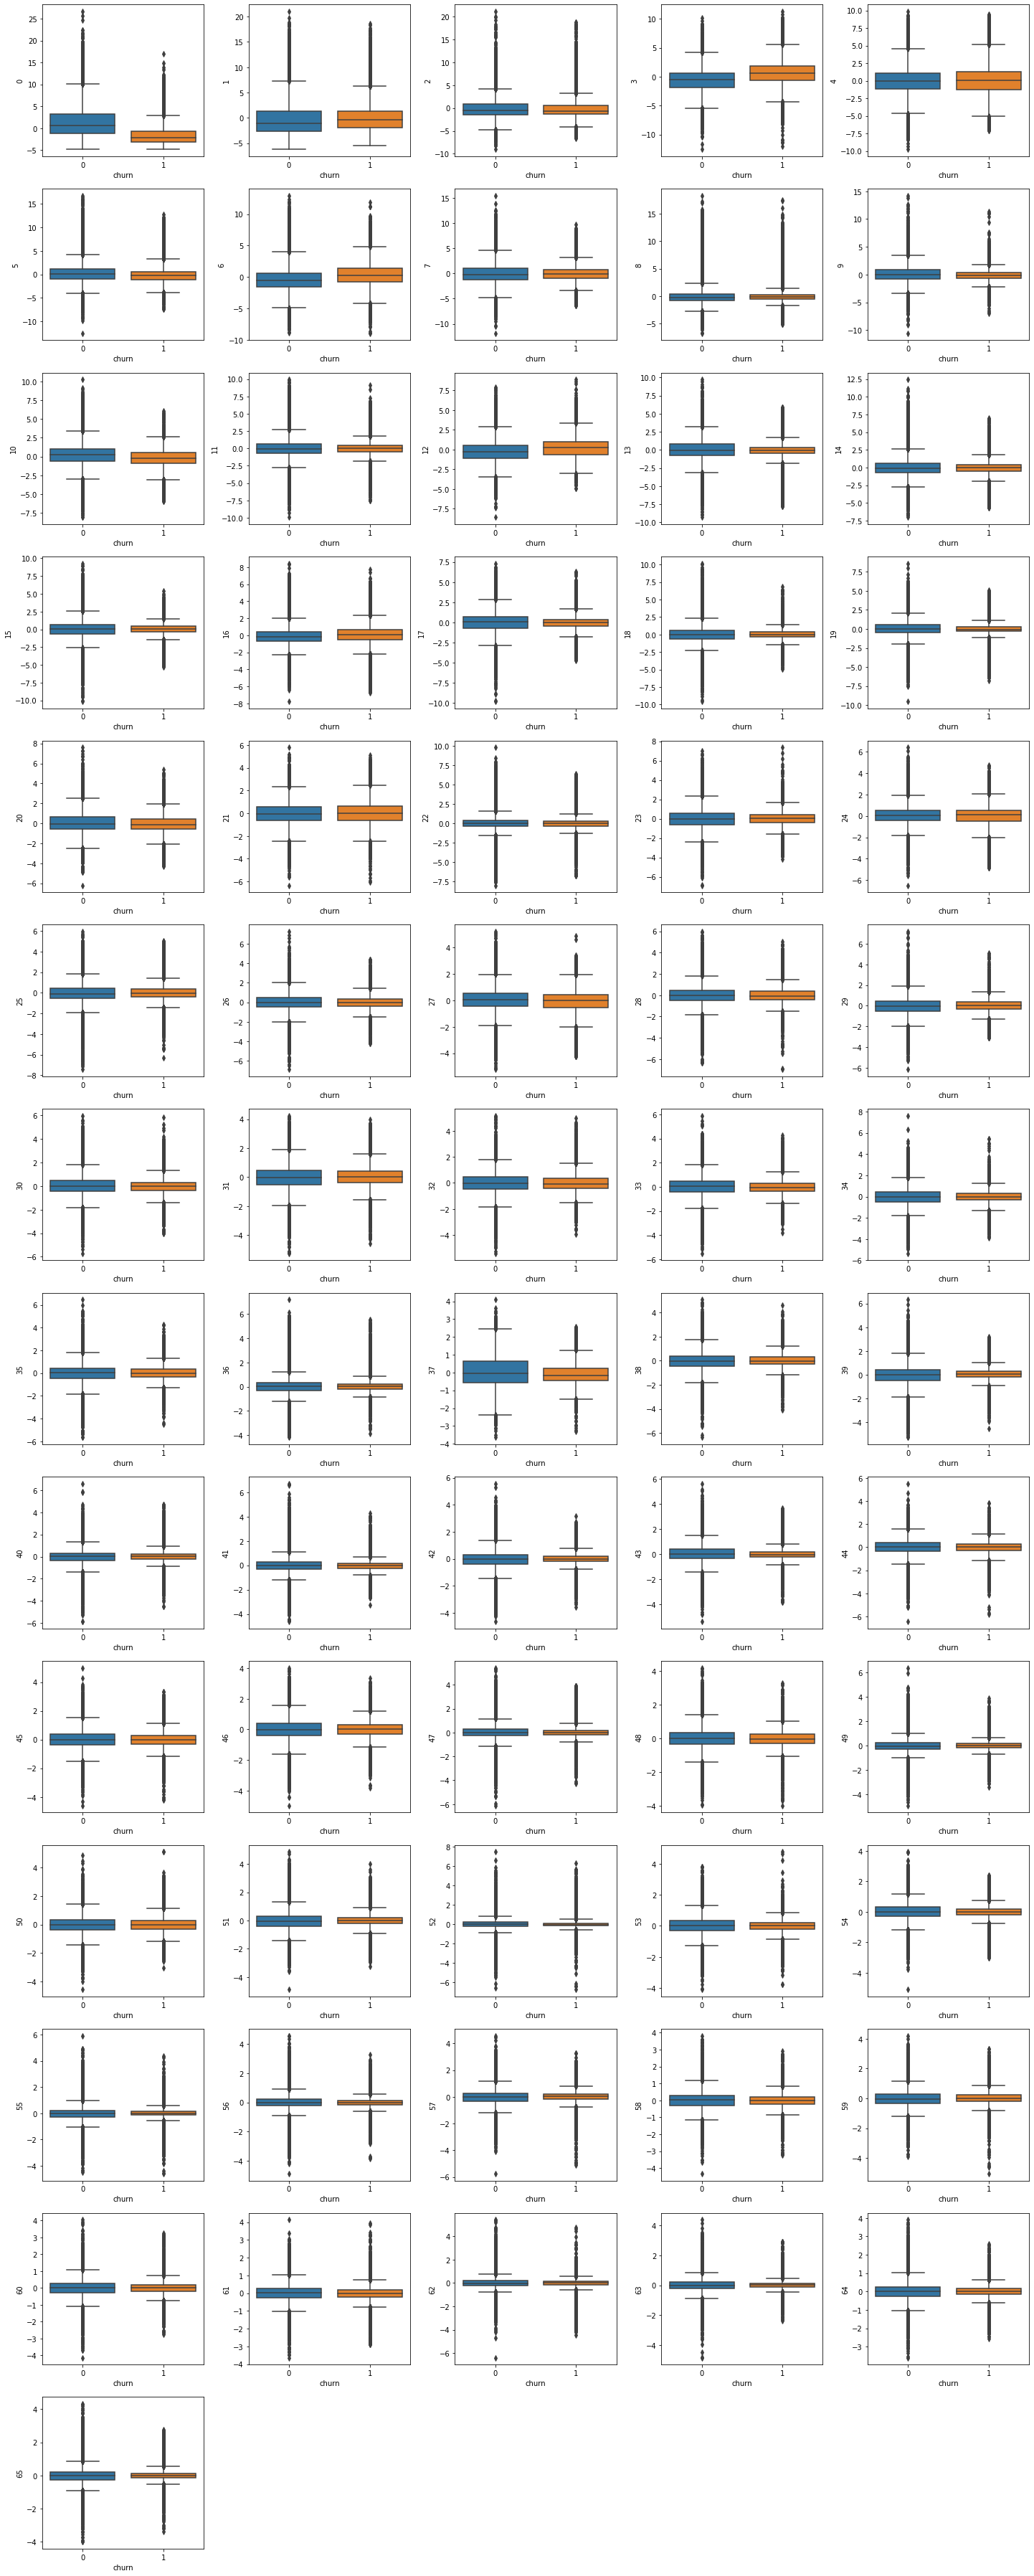

In [74]:
# Knowing the difference in spread of the w.r.t to churn column
plt.figure(figsize=(20, 50))
for i in range(len(df_train_pca.columns)):
    plt.subplot(14,5,i+1)
    sns.boxplot(y=df_train_pca.iloc[:,i], x=y_train)
plt.tight_layout()
plt.show()

In [75]:
np_test_pca = pca_final.transform(X_test)
np_test_pca.shape

(9004, 66)

In [76]:
df_test_pca = pd.DataFrame(np_test_pca)
df_test_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65
0,-1.733519,2.043926,-2.630515,4.157069,3.474314,-0.234653,1.489570,1.009238,-0.550534,0.110114,-0.438695,0.273609,-1.043974,0.376684,0.256279,1.213495,-0.855439,-0.381940,0.611416,-0.123703,0.717224,-1.325298,-0.031701,-0.375283,0.204539,-0.826250,1.471576,2.253954,0.121451,0.912798,0.476116,0.461811,0.510613,-0.355892,0.008655,-0.294556,0.367319,-0.078058,0.083587,-0.279524,0.060241,0.079644,0.176219,-0.116198,0.077136,-0.363374,0.355060,0.378012,0.274779,0.102975,0.272923,0.117964,0.177917,0.288903,0.237049,-0.026992,-0.067955,-0.192536,0.023321,0.255840,-0.181320,0.318464,-0.173281,0.052653,0.068353,0.156847
1,-1.384976,4.773357,-0.233473,-0.888388,-2.038023,1.476624,4.502376,-1.071984,-1.134973,0.440644,-0.221327,0.015191,1.611433,0.933117,-1.196393,-0.265603,-0.449800,1.276890,-0.176922,0.142947,-0.570065,-0.518278,0.584397,0.264443,0.349422,0.047233,0.085889,-0.575972,1.083069,-0.997199,-1.176553,-1.380587,0.575666,-0.764995,-1.189074,-1.640122,-0.207200,-0.163302,1.089783,0.434540,-0.754167,0.575539,0.050965,0.343036,-1.099743,0.013473,-0.794925,-0.487169,0.267128,0.026820,0.019320,-0.054861,-0.730654,-1.230905,-1.053737,-0.320569,0.794473,0.034344,0.358308,-0.118375,-0.710280,0.689227,0.020803,-0.320463,0.212090,0.332633
2,-0.092785,-4.018901,2.358275,-2.715423,1.598474,-1.446930,0.757636,-0.657885,-2.016972,-1.066303,-0.697085,-0.560999,-1.511047,-0.209831,-0.090822,0.040571,-0.971485,-0.572646,0.085269,1.243213,-0.408146,-0.619224,-0.188156,-0.518081,0.292300,-0.601168,0.140690,-0.026263,-0.452599,0.083107,-1.012051,-0.579718,-0.125175,0.655302,-0.853611,-0.629862,0.025539,1.358101,0.492813,-0.864205,-0.152648,0.027402,-0.925192,1.630425,0.351764,-0.074802,-0.037484,-0.246917,-0.047577,0.016724,-0.045747,0.564559,-0.036675,0.101313,-0.279458,0.060591,0.239894,-0.500951,-0.805489,-0.224934,-0.059645,0.079634,0.122495,0.439457,-0.232084,0.200229
3,1.021659,-1.412021,-2.146280,0.072035,-0.054814,0.045598,-2.011187,1.377859,1.151162,0.145529,-1.006496,-0.796778,-1.051165,-2.046897,-1.568479,-0.698068,-0.156472,-2.009029,1.149867,0.120071,0.227358,0.010877,-0.431627,-2.310411,0.353014,-0.737824,-0.100419,-0.116502,-0.476710,-0.158730,0.410943,-0.447352,-0.200359,-0.327090,-0.342285,0.352582,0.203592,0.936828,0.294991,-1.432506,0.204020,0.032489,0.275176,-0.171731,0.401435,0.027200,-0.745029,0.021866,0.327513,0.069948,0.481358,0.292106,0.177159,0.040878,0.113425,-0.016553,-0.061762,-0.127145,-0.039266,0.129104,0.058641,0.191496,0.014442,-0.088839,0.015884,0.091979
4,3.459725,0.736842,-4.669897,-0.284723,-5.976495,-4.331492,-1.209422,-0.452708,-1.311107,-2.801801,6.507380,-0.971609,4.575090,1.043304,4.240895,0.165102,-0.247623,-1.611863,2.595414,-0.624297,-1.138411,0.375486,-0.958460,2.398653,0.012056,0.182983,1.354878,-0.031081,0.214288,0.108744,0.255487,1.319348,-0.264623,0.747473,0.434175,-1.359443,-1.073408,-1.777952,1.896675,-4.443515,1.051751,-0.547414,-0.260329,0.090029,0.059518,0.218858,-0.592674,-0.198025,-0.375204,-0.010984,0.095109,-0.070524,-0.361293,-0.116104,-0.233439,0.096856,-0.027453,0.629062,-0.481299,0.027103,-0.385890,-0.615564,0.564757,-0.512350,-0.449801,0.396304


In [77]:
df_test_pca.shape

(9004, 66)

## Model 1: Logistic Regression

In [78]:
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca, y_train)

In [79]:
pred_probs_test = model_pca.predict_proba(df_test_pca)

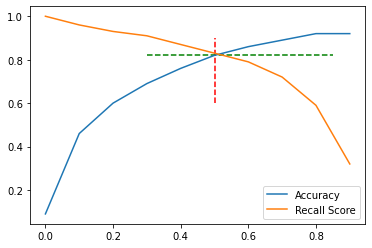

In [80]:
#Tuning the cut off probability
array_cutoff = []
array_recall = []
array_accuracy = []

for i in range(10):
  array_cutoff.append(round(i*0.1,2))

def recall_score_com (limit,y_test):
  filter = lambda x: 1 if x > limit else 0
  vfunc = np.vectorize(filter)
  pred_out = vfunc( pred_probs_test[:,1])
  return round(metrics.recall_score(y_test, pred_out),2)

def accuracy_score_com (limit,y_test):
  filter = lambda x: 1 if x > limit else 0
  vfunc = np.vectorize(filter)
  pred_out = vfunc( pred_probs_test[:,1])
  return round(metrics.accuracy_score(y_test, pred_out),2)

for val in array_cutoff:
  array_recall.append(recall_score_com(val,y_test))
  array_accuracy.append(accuracy_score_com(val,y_test))

plt.vlines(x=0.5, ymax=0.9, ymin=0.6, colors="r", linestyles="--")
plt.hlines(y=0.82, xmax=0.85, xmin=0.3, colors="g", linestyles="--")
plt.plot(array_cutoff, array_accuracy,label="Accuracy")
plt.plot(array_cutoff, array_recall,label="Recall Score")
plt.legend()
plt.show()

In [81]:
filter = lambda x: 1 if x > 0.47 else 0
vfunc = np.vectorize(filter)
pred_out = vfunc( pred_probs_test[:,1])

In [82]:
metrics.recall_score(y_test, pred_out)

0.8415584415584415

In [83]:
metrics.accuracy_score(y_test, pred_out)

0.8013105286539316

## Model 2: Decision Tree

### Hyperparameter Tuning

In [84]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(1, 10, 3),
    'min_samples_leaf': range(10, 160, 50),
    'min_samples_split': range(10, 160, 50)
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1, scoring="recall")

# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  2.4min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10, 3),
                         'min_samples_leaf': range(10, 160, 50),
                         'min_samples_split': range(10, 160, 50)},
             scoring='recall', verbose=1)

In [85]:
# scores of GridSearch CV
scores = grid_search.cv_results_
pd.DataFrame(scores)

# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8174002217038805
DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=10)


### Modeling

In [94]:
# Fitting the decision tree using tuned hyperparatemer and some trial & error
dt_acc = DecisionTreeClassifier(max_depth=7, min_samples_leaf=10,
                       min_samples_split=10, class_weight='balanced')
dt_acc.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=7,
                       min_samples_leaf=10, min_samples_split=10)

In [95]:
# Making predictions
y_pred_default = dt_acc.predict(df_test_pca)

In [96]:
metrics.recall_score(y_test, y_pred_default)

0.7272727272727273

In [97]:
metrics.accuracy_score(y_test, y_pred_default)

0.805752998667259

## Model 3: Random Forest

### Hyperparameter Tuning

In [79]:
# Number of folds for k-fold CV
n_folds = 3

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(100, 500, 200),
    'n_estimators': [20,100,200], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = n_folds, n_jobs = -1,verbose = 1, scoring="recall")

# Fit the grid search to the data
rf_grid_search.fit(df_train_pca, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 15.3min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [4, 8, 10], 'max_features': [5, 10],
                         'min_samples_leaf': range(100, 400, 200),
                         'min_samples_split': range(100, 500, 200),
                         'n_estimators': [20, 100, 200]},
             scoring='recall', verbose=1)

In [80]:
# scores of GridSearch CV
scores = rf_grid_search.cv_results_
pd.DataFrame(scores)

# printing the optimal accuracy score and hyperparameters
print("best accuracy", rf_grid_search.best_score_)
print(rf_grid_search.best_estimator_)

best accuracy 0.8247505622656242
RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=100)


### Modeling

In [99]:
# Running the random forest with tuned parameters and some minor trial & error
rfc = RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=100)

# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=100,
                       min_samples_split=100)

In [100]:
# Making predictions
predictions = rfc.predict(df_test_pca)

In [101]:
metrics.recall_score(y_test, predictions)

0.7246753246753247

In [102]:
metrics.accuracy_score(y_test, predictions)

0.8651710350955131

# Conclusion:

## The Top Predicting Variables are as follows:
1. spl_ic_mou_6
2. loc_og_t2t_mou_6
3. loc_ic_t2t_mou_6
4. arpu_8
5. monthly_2g_6
6. vol_2g_mb_6
7. monthly_2g_6
8. loc_ic_t2f_mou_6
9. max_rech_amt_6
10. std_og_t2t_mou_6
11. roam_og_mou_8
12. std_og_mou_8

## Accuracy Model:
### Logistic Regression applied after PCA gives the best overall results.

## Recommendations:
1. It would be really benificial, if telecom company introduces a special offer to increase minutes of usage within same operater for High value customers beacuse churn rate is observed to be increased for lower usage.
2. Improving offers of the 2G internet data would be really helpful for company because churn rate is seen to be increasing if the 2G data consumption is less.
3. Give the customer some benifits on special incoming calls.